# LightGBM

LightGBMはMicrosoftが開発した勾配ブースティングフレームワークです。特徴としては、大規模データセットの高速処理が可能で、低メモリ消費、高い効率、カテゴリーデータのネイティブサポートなどがあります。また、GPUのサポートも提供し、精度の向上を図りつつ計算時間を大幅に削減できる点が際立っています。

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/fuyu-quant/data-science-wiki/blob/main/tabledata/regression/LightGBM.ipynb)

In [ ]:
!pip install lightgbm==4.0.0

In [22]:
import lightgbm as lgb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_breast_cancer

#### データセットの用意

In [5]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [23]:
x = df.drop('target', axis = 1)
y = df['target']

X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)


### LightGBMの学習

In [24]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

num_round = 100
lgbm_model = lgb.train(params, lgb_train, num_round, valid_sets=lgb_eval)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

### 予測

In [25]:
# 予測
y_pred = lgbm_model.predict(X_valid, num_iteration=lgbm_model.best_iteration)

In [26]:
auc = roc_auc_score(y_valid, y_pred)
print(f'AUC: {auc}')

AUC: 0.9914837864395677


#### 特徴量重要度
* 特徴量重要度の算出には二つの方法がある
* 「出現頻度」による重要度
* 「目的関数の減少量」による重要度
* 特徴量可視化ツールの説明(https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.plot_importance.html)

In [14]:
#特徴量重要度の可視化
importance = pd.DataFrame(lgbm_model.feature_importance(importance_type = 'split'),index = x.columns,columns=['importance'])
importance = importance.sort_values('importance', ascending=False)
display(importance)

,importance
worst texture,216
worst concave points,176
mean texture,153
mean concave points,119
worst perimeter,111
area error,109
compactness error,104
texture error,85
worst symmetry,84
worst smoothness,78


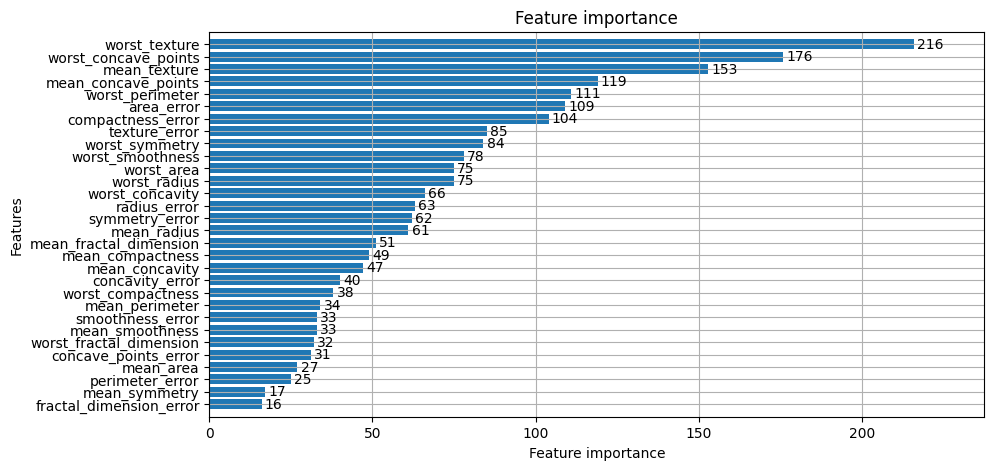

In [15]:
#可視化
lgb.plot_importance(lgbm_model, height = 0.8 ,figsize = (10,5),importance_type='split',)
plt.show()

In [16]:
#目的関数の減少量による重要度
importance = pd.DataFrame(lgbm_model.feature_importance(importance_type = 'gain'),index = x.columns,columns=['importance'])
importance = importance.sort_values('importance', ascending=False)
display(importance)

,importance
mean concave points,2238.214569
worst concave points,1628.038677
worst area,493.310994
worst perimeter,353.319352
worst texture,310.108239
worst radius,270.588252
mean texture,169.906644
worst concavity,143.391849
area error,75.013999
radius error,63.840965


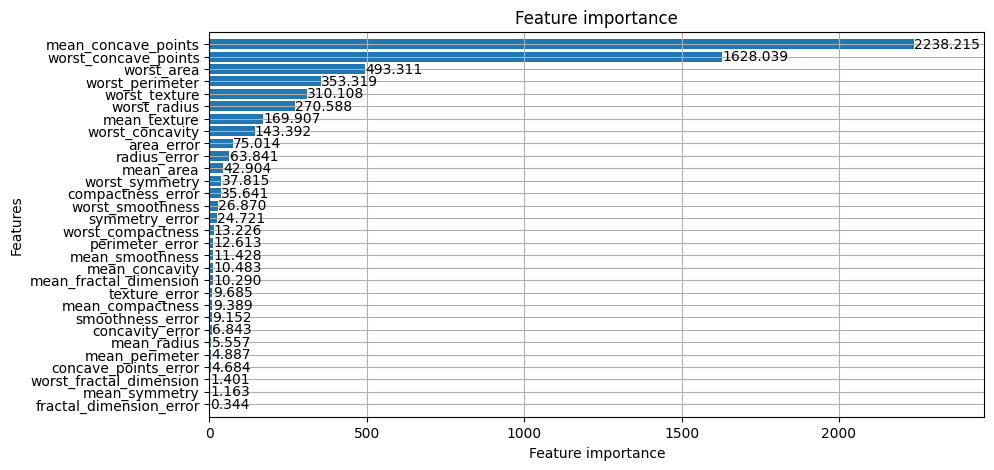

In [17]:
#可視化
lgb.plot_importance(lgbm_model, height = 0.8 ,figsize = (10,5),importance_type='gain',)
plt.show()